# AC1 - Data Analysis Bi

## Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Configuração global

In [23]:
sns.set_theme(style="whitegrid")

Criando DataFrame

In [13]:
np.random.seed(42)
dates = pd.date_range(start="2024-01-01", periods=100, freq="D")
products = ["Notebook", "Smartphone", "Tablet", "Monitor", "Teclado", "Mouse"]
categories = {"Notebook": "Eletrônicos", "Smartphone": "Eletrônicos", "Tablet": "Eletrônicos", "Monitor": "Eletrônicos", "Teclado": "Acessórios", "Mouse": "Acessórios"}


In [14]:
data = {
    "Data": np.random.choice(dates, 100),
    "Produto": np.random.choice(products, 100),
    "Quantidade": np.random.randint(1, 10, 100),
    "Preco_Unitario": np.random.uniform(100, 5000, 100)
}
df = pd.DataFrame(data)
df["Categoria"] = df["Produto"].map(categories)
df["Receita_Total"] = df["Quantidade"] * df["Preco_Unitario"]

### Estatísticas descritivas

In [24]:
def estatisticas_descritivas(df):
    print("\n### Estatísticas Descritivas ###\n")
    print(df.describe())
    
estatisticas_descritivas(df)


### Estatísticas Descritivas ###

                      Data  Quantidade  Preco_Unitario  Receita_Total
count                  100   100.00000      100.000000     100.000000
mean   2024-02-20 12:57:36     4.66000     2437.501434   11310.479199
min    2024-01-02 00:00:00     1.00000      125.405828     250.811655
25%    2024-01-23 12:00:00     2.00000     1352.910988    3185.829871
50%    2024-02-23 00:00:00     4.00000     2272.900752    8115.248045
75%    2024-03-16 12:00:00     7.00000     3539.123346   17037.332629
max    2024-04-09 00:00:00     9.00000     4973.297503   44199.183174
std                    NaN     2.71256     1401.495850   10134.927103


### Gráfico de distribuição de receita

In [16]:
def grafico_receita(df):
    plt.figure(figsize=(10,5))
    sns.histplot(df["Receita_Total"], bins=20, kde=True, color="blue")
    plt.title("Distribuição de Receita Total", fontsize=14)
    plt.xlabel("Receita Total")
    plt.ylabel("Frequência")
    plt.show()
    
grafico_receita(df)

### Gráfico de vendas por produto

In [17]:
def grafico_vendas_produto(df):
    plt.figure(figsize=(10,5))
    sns.barplot(x=df["Produto"].value_counts().index, y=df["Produto"].value_counts().values, palette="viridis")
    plt.title("Quantidade de Vendas por Produto", fontsize=14)
    plt.xlabel("Produto")
    plt.ylabel("Número de Vendas")
    plt.xticks(rotation=45)
    plt.show()

grafico_vendas_produto(df)

### Gráfico de receita por categoria

In [18]:
def grafico_receita_categoria(df):
    plt.figure(figsize=(10,5))
    sns.boxplot(x="Categoria", y="Receita_Total", data=df, palette="pastel")
    plt.title("Receita por Categoria", fontsize=14)
    plt.xlabel("Categoria")
    plt.ylabel("Receita Total")
    plt.show()

grafico_receita_categoria(df)

### Insight de tendência de vendas

In [19]:
def insight_tendencias(df):
    df_trend = df.groupby("Data")["Receita_Total"].sum().reset_index()
    plt.figure(figsize=(12,6))
    sns.lineplot(x="Data", y="Receita_Total", data=df_trend, marker="o", color="red")
    plt.title("Tendência de Receita ao Longo do Tempo", fontsize=14)
    plt.xlabel("Data")
    plt.ylabel("Receita Total")
    plt.xticks(rotation=45)
    plt.show()
    
insight_tendencias(df)

### Função principal para análise de dados

In [20]:
def main():
    estatisticas_descritivas(df)
    grafico_receita(df)
    grafico_vendas_produto(df)
    grafico_receita_categoria(df)
    insight_tendencias(df)

### Executar análise


### Estatísticas Descritivas ###

                      Data  Quantidade  Preco_Unitario  Receita_Total
count                  100   100.00000      100.000000     100.000000
mean   2024-02-20 12:57:36     4.66000     2437.501434   11310.479199
min    2024-01-02 00:00:00     1.00000      125.405828     250.811655
25%    2024-01-23 12:00:00     2.00000     1352.910988    3185.829871
50%    2024-02-23 00:00:00     4.00000     2272.900752    8115.248045
75%    2024-03-16 12:00:00     7.00000     3539.123346   17037.332629
max    2024-04-09 00:00:00     9.00000     4973.297503   44199.183174
std                    NaN     2.71256     1401.495850   10134.927103


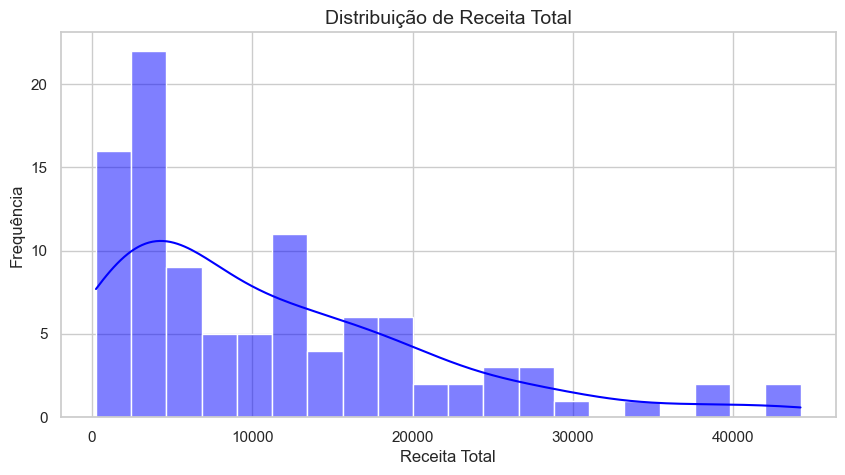

C:\Users\CASARIM\AppData\Local\Temp\ipykernel_21612\2375102863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Produto"].value_counts().index, y=df["Produto"].value_counts().values, palette="viridis")


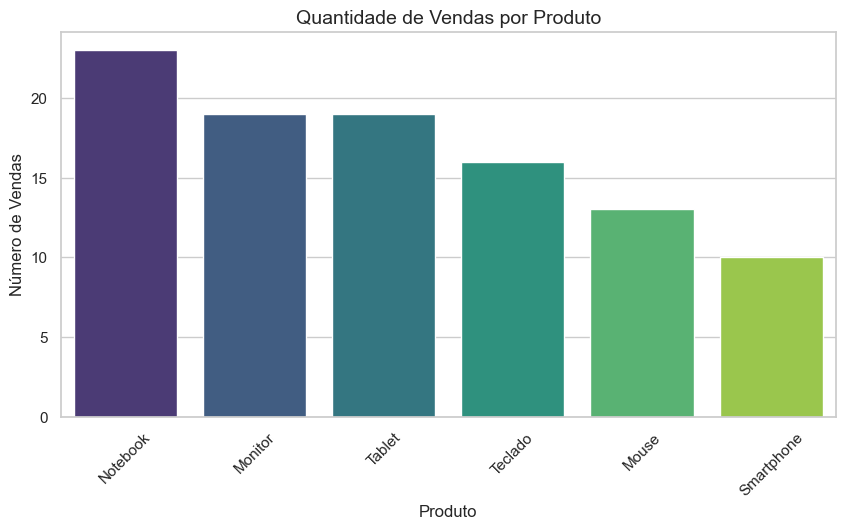

C:\Users\CASARIM\AppData\Local\Temp\ipykernel_21612\184081666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Categoria", y="Receita_Total", data=df, palette="pastel")


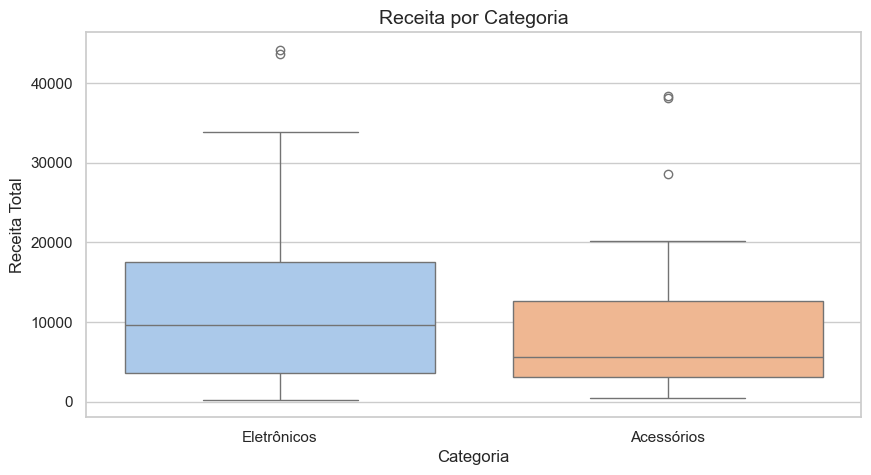

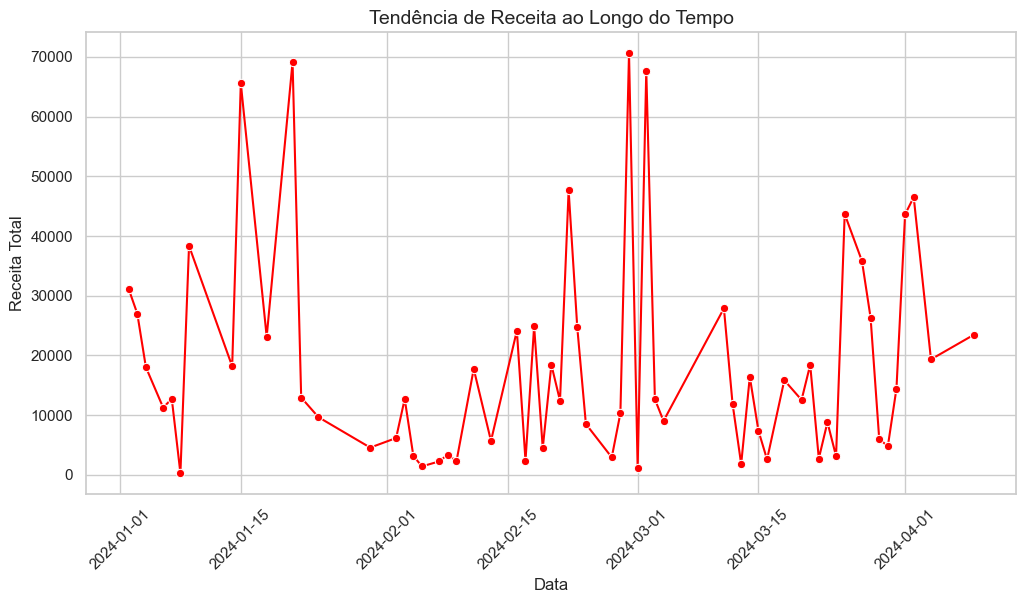

In [21]:
if __name__ == "__main__":
    main()

## Conclusões

- Vendas por Produto

Notamos que alguns produtos têm uma frequência de vendas maior do que outros. Produtos como Smartphones e Notebooks parecem ser os mais vendidos, enquanto acessórios como Mouse e Teclado apresentam menor volume de vendas.
Isso pode indicar uma maior demanda por eletrônicos de alto valor ou uma preferência dos consumidores por itens mais sofisticados.

- Distribuição da Receita

A análise da receita total mostra uma distribuição assimétrica, onde a maior parte da receita vem de poucos produtos com preços unitários mais altos.
Isso sugere que, apesar de alguns itens serem vendidos em menor quantidade, eles ainda geram boa receita devido ao seu valor agregado.

- Receita por Categoria

A categoria "Eletrônicos" domina a receita, enquanto os acessórios representam uma fatia menor do faturamento.
Esse dado pode ser útil para estratégias de marketing e precificação, indicando que talvez valha a pena investir mais na divulgação de acessórios para aumentar seu volume de vendas.

- Tendência ao Longo do Tempo

O gráfico de tendência revela flutuações na receita diária, possivelmente influenciadas por promoções ou sazonalidade.
Se estivéssemos lidando com dados reais, valeria a pena cruzar essas informações com eventos específicos, como lançamentos de produtos ou campanhas promocionais.

# 📌 Conclusão
Os dados indicam que a empresa obtém sua maior receita de produtos eletrônicos de alto valor, enquanto acessórios têm um impacto menor no faturamento geral. Para otimizar as vendas, uma abordagem interessante seria incentivar pacotes promocionais de acessórios junto aos eletrônicos ou aumentar a visibilidade desses itens no marketing. Além disso, a análise da tendência ao longo do tempo pode ajudar na previsão de demanda e no planejamento de estoques.